# Produce Fig. 2 of Donada et al. 2023
### Selecting the main-sequence members of selected OCs

In [1]:
import os
import numpy as np
from astropy.table import Table, vstack, join
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib import patches
from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams["axes.grid"]   = False
rcParams["xtick.labelsize"] = 13
rcParams["ytick.labelsize"] = 13

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
font = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 14}

from scipy.stats import linregress

from matplotlib.legend_handler import HandlerLine2D

In [2]:
# Read complete Cantat-Gaudin+2020 catalogue and select all OCs closer than 1.5 kpc
Cantat_table = Table.read("data/Cantat-Gaudin2020_joint_CMD.fits")
Cantat_table_nearer_1point5kpc = Cantat_table[ Cantat_table["DistPc"] <= 1500. ]

In [3]:
# Ruprecht 147: Cantat+2020 members
Cantat_BH164        = Table.read("data/Cantat_selected_members_OCs_younger50Myr/BH_164_sel_MS_members_Cantat.txt",
                                 format="ascii")
# Ruprecht 147: Tarricq+2022 members
Tarricq_Ruprecht147 = Table.read("data/Tarricq_selected_members_OCs/Ruprecht_147_sel_MS_members_Tarricq.txt", 
                                 format = "ascii")

In [4]:
Cantat_BH164

RA_ICRS_1,DE_ICRS_1,source_id,GLON_1,GLAT_1,Plx_1,e_Plx_1,pmRA__1,e_pmRA__1,pmDE_1,e_pmDE_1,RV,e_RV,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,o_Gmag,Gmag,BP-RP,proba,Cluster_1,Teff50,_RA_icrs_1,_DE_icrs_1,Cluster_2,RA_ICRS_2,DE_ICRS_2,GLON_2,GLAT_2,r50,nbstars07,pmRA__2,e_pmRA__2,pmDE_2,e_pmDE_2,plx_2,e_plx_2,Flag,AgeNN,AVNN,DMNN,DistPc,X,Y,Z,Rgc,SimbadName,_RA_icrs_2,_DE_icrs_2,GroupID_1,GroupSize_1,phot_g_mean_flux_over_error,phot_bp_mean_flux_over_error,phot_rp_mean_flux_over_error,gaiadr2,cluster,GroupID,GroupSize,MG,BP-RP_0,BP-RP_0_lim,allDeltas
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str6,float64,float64,float64,str6,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,float64,str11,float64,float64,int64,int64,float64,float64,float64,int64,str6,int64,int64,float64,float64,float64,float64
223.8448944091797,-66.66061401367188,5848656944977036160,314.782225188038,-6.68412346896242,2.31818952852186,0.06480675935745239,-6.68965122181908,0.06444574147462845,-11.0832841809241,0.10850369185209274,0.0,0.0,0.21695803105831146,-0.19607479870319366,-0.45874860882759094,-0.17885996401309967,-0.31677666306495667,-0.0924944281578064,-0.6430937647819519,-0.13905497,0.2788841,0.16674474,314,8.095733642578125,-0.028049469,0.699999988079071,BH_164,10676.140625,223.84495544433594,-66.66056823730469,BH_164,222.31100463867188,-66.46499633789062,314.322998046875,-6.235000133514404,0.6389999985694885,204,-7.368000030517578,0.33500000834465027,-10.71399974822998,0.2809999883174896,2.364000082015991,0.07800000160932541,NN,7.510000228881836,0.17000000178813934,8.210000038146973,438.0,304.0,-311.0,-47.0,8041.0,Cl VDBH 164,222.31109619140625,-66.46499633789062,1723,204,2756.5732421875,1785.99755859375,1207.5006103515625,5848656944977036160,BH_164,--,--,-0.2655664086341858,-0.10983324796547317,-0.3448028564453125,-0.6802928906070118
222.2038116455078,-66.58284759521484,5848625815053920256,314.232216839266,-6.32159585980627,2.37624073301596,0.06233259662985802,-7.92018286380723,0.061432987451553345,-10.974599481398,0.09142022579908371,0.0,0.0,0.1611575484275818,-0.2612974941730499,-0.19049322605133057,-0.18428394198417664,-0.2251506894826889,-0.09811235964298248,-0.38359278440475464,-0.049912054000000004,0.3834715,0.22075114,349,8.664006233215332,-0.004956245400000001,1.0,BH_164,8846.75390625,222.2039031982422,-66.58280181884766,BH_164,222.31100463867188,-66.46499633789062,314.322998046875,-6.235000133514404,0.6389999985694885,204,-7.368000030517578,0.33500000834465027,-10.71399974822998,0.2809999883174896,2.364000082015991,0.07800000160932541,NN,7.510000228881836,0.17000000178813934,8.210000038146973,438.0,304.0,-311.0,-47.0,8041.0,Cl VDBH 164,222.31109619140625,-66.46499633789062,1723,204,2796.625,1231.848388671875,1071.1279296875,5848625815053920256,BH_164,--,--,0.30270618200302124,-0.08674002436547318,-0.3448028564453125,-0.21078226814036372
222.72068786621094,-66.52289581298828,5848717967876097280,314.444482874461,-6.35880198258139,2.30657221004652,0.04470047354698181,-7.12634055961905,0.05183989927172661,-11.0972249538218,0.07513576000928879,0.0,0.0,0.23232565820217133,-0.1583113819360733,-0.22622641921043396,-0.12803484499454498,0.007081869523972273,-0.1205764189362526,-0.2572411298751831,-0.047144927,0.08397971,0.3263189,404,8.844298362731934,-0.0029554367,1.0,BH_164,10069.5361328125,222.72076416015625,-66.5228500366211,BH_164,222.31100463867188,-66.46499633789062,314.322998046875,-6.235000133514404,0.6389999985694885,204,-7.368000030517578,0.33500000834465027,-10.71399974822998,0.2809999883174896,2.364000082015991,0.07800000160932541,NN,7.510000228881836,0.17000000178813934,8.210000038146973,438.0,304.0,-311.0,-47.0,

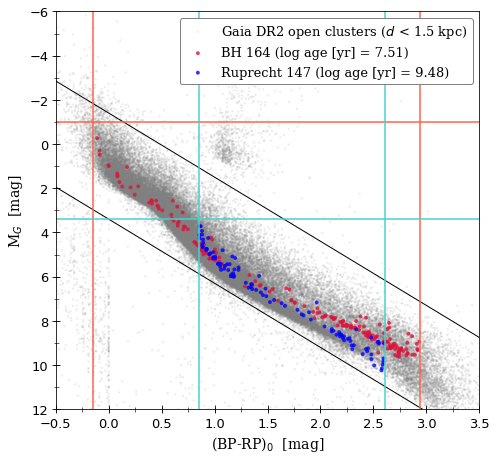

In [5]:
fig = plt.figure(figsize=(7,6.5))
ax  = plt.subplot(111)
xrange=(-0.5, 3.5)
yrange=(12., -6)
plt.axis([xrange[0], xrange[1], yrange[0], yrange[1]])
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which="major", direction='inout', length=8.)
ax.tick_params(which="minor", direction='inout', length=5.)
ax.set_xlabel(r"(BP-RP)$_{0}$  [mag]", fontdict=font)
ax.set_ylabel(r"M$_{G}$  [mag]", fontdict=font)

# Diagonal lines (cuts):
xpts_cuts = np.linspace(-0.5, 3.5, 1000)
plt.plot(xpts_cuts, 2.9*xpts_cuts-1.4, color="black", linewidth=1)
plt.plot(xpts_cuts, 2.9*xpts_cuts+3.4, color="black", linewidth=1)

# BH 164 cuts:
plt.axvline(-0.1448028, color='tomato', ls="-")  #, zorder=0
plt.axvline(2.9417117, color='tomato', ls="-")
plt.axhline(-1.0155664, color='tomato', ls="-")

# Ruprecht 147cuts:
plt.axvline(0.8485312, color='mediumturquoise', ls="-")  #, zorder=0
plt.axvline(2.6105898, color='mediumturquoise', ls="-")
plt.axhline(3.37, color='mediumturquoise', ls="-")

# Data and colour bar
sc = ax.scatter(Cantat_table_nearer_1point5kpc["BP_RP_zero"], Cantat_table_nearer_1point5kpc["M_G"],
                marker="o", color = "grey", edgecolor = "none", s=5, alpha = 0.15, 
                label="Gaia DR2 open clusters ($d$ < 1.5 kpc)")
sc = ax.scatter(Cantat_BH164["BP-RP_0"], Cantat_BH164["MG"],
                marker="o", color = "crimson", edgecolor = "none", s=15, alpha = 0.8,
                label=r"BH 164 (log age [yr] = 7.51)")
sc = ax.scatter(Tarricq_Ruprecht147["BP-RP_0"], Tarricq_Ruprecht147["MG"],
                marker="o", color = "blue", edgecolor = "none", s=15, alpha = 0.8,
                label=r"Ruprecht 147 (log age [yr] = 9.48)")

def change_alpha(handle, original):
    ''' Change the alpha and marker style of the legend handles '''
    handle.update_from(original)
    handle.set_alpha(1)
    handle.set_marker('.')
    handle._legmarker.set_markersize(60)

plt.legend(prop={"family":"serif", 'size': 13}, framealpha=1.0, edgecolor="grey",
          handler_map={plt.Line2D: HandlerLine2D(update_func=change_alpha)}) #loc='upper left', bbox_to_anchor=(0.0, 0.86)
plt.tight_layout()
plt.savefig("im/CMD_2OCs_cuts.png", dpi=300)